In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
sndata = pd.read_csv('./Data/parsonage.txt', sep = ' ', engine='python')

In [3]:
results = np.load(f'./Results/MCMC/MCMC_curved_SN+BAO_0.npy'), np.load(f'./Results/MCMC/MCMC_curved_SN+BAO_1.npy'), np.load(f'./Results/MCMC/MCMC_curved_SN+BAO_2.npy'), np.load(f'./Results/MCMC/MCMC_curved_SN+BAO_3.npy')
burn_in = 1000
MCMC_fin = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)
Best_fit = MCMC_fin[:,np.argmax(MCMC_fin[-1])]

In [58]:
!pip install --upgrade findiff

DEPRECATION: Loading egg at /home/john1256/anaconda3/lib/python3.12/site-packages/vast-1.4.2-py3.12-linux-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /home/john1256/anaconda3/lib/python3.12/site-packages/pyopengltk-0.0.4-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /home/john1256/anaconda3/lib/python3.12/site-packages/vispy-0.14.3-py3.12-linux-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /home/john1256/anaconda3/lib/python3.12/site-packages

In [4]:
from scipy.interpolate import interp1d
from scipy.optimize import fsolve
def integrand(a, parm):
    Ez2 = (parm[0] / (a**3) + parm[1] + (1-parm[0]-parm[1]) /(a**2))
    negative_Ez2_ind = Ez2 < 0
    Ez = np.zeros_like(a)
    Ez[negative_Ez2_ind] = -np.sqrt(-Ez2[negative_Ez2_ind])
    Ez[~negative_Ez2_ind] = np.sqrt(Ez2[~negative_Ez2_ind])
    return Ez

In [5]:
crit_point = fsolve(integrand, 1.5, args=(Best_fit[:-1],))

In [7]:
crit_point[0]

1.3216575077129713

In [8]:
# calculate the age of the universe with respect to the evolution of the scale factor
# we want to get the graph of the evolution of a with respect to the H0*t
from scipy.integrate import quad

def integrand_age(a, parm):
    Ez2 = (parm[0] / (a**3) + parm[1] + (1-parm[0]-parm[1]) /(a**2))
    return 1/np.sqrt(Ez2)

def AgeofUniverse(a,parm, turn_over = False):
    if turn_over==False: # if the universe hasn't turned over yet
        I = quad(integrand_age, 0,a, args= (parm))[0]
    else: # if the universe has experienced a turn over
        I = quad(integrand_age,0,crit_point[0], args=(parm))[0]
        I += quad(integrand_age, a, crit_point[0], args=(parm))[0]
    return I

In [9]:
Turnover_before = np.linspace(0, crit_point[0], 100)
Turnover_after = np.linspace(crit_point[0], 0, 100)

In [28]:
H0_in_Gyr = Best_fit[2]*0.0010227121650456948
H0_in_Gyr

0.020548532177423574

/tmp/ipykernel_9517/4274298178.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  Ez2 = (parm[0] / (a**3) + parm[1] + (1-parm[0]-parm[1]) /(a**2))
/tmp/ipykernel_9517/4274298178.py:6: RuntimeWarning: invalid value encountered in scalar add
  Ez2 = (parm[0] / (a**3) + parm[1] + (1-parm[0]-parm[1]) /(a**2))
/tmp/ipykernel_9517/4274298178.py:11: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  I = quad(integrand_age, 0,a, args= (parm))[0]


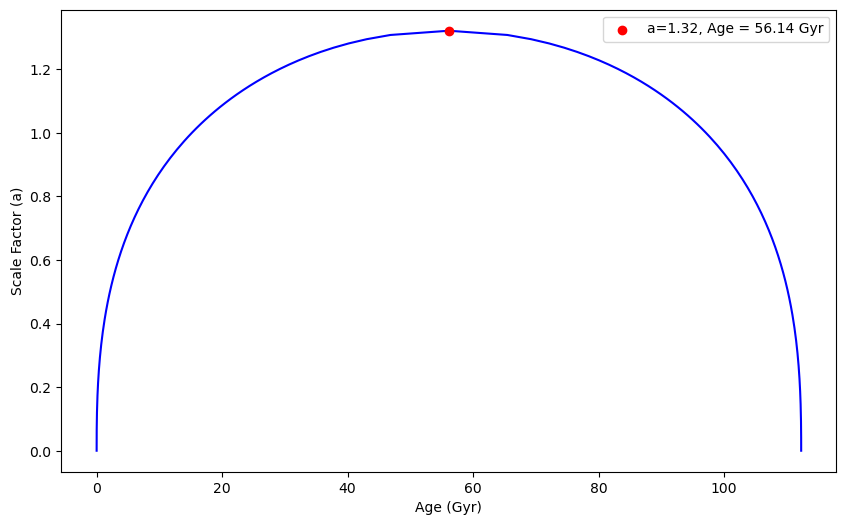

In [37]:
AgeofUniverse_before = np.array([AgeofUniverse(a, Best_fit[:2], turn_over=False) for a in Turnover_before])
AgeofUniverse_before[0] = 0  # Set the age at a=0 to 0
AgeofUniverse_after = 2*AgeofUniverse_before[-1] - AgeofUniverse_before[::-1] 
AgeofUniverse_total = np.concatenate((AgeofUniverse_before, AgeofUniverse_after))/H0_in_Gyr
plt.figure(figsize=(10, 6))
plt.plot(AgeofUniverse_total,np.concatenate((Turnover_before, Turnover_after)), color='blue')
plt.scatter(AgeofUniverse_before[-1]/H0_in_Gyr, crit_point[0], color='red', label=f'a={crit_point[0]:.2f}, Age = {AgeofUniverse_before[-1]/H0_in_Gyr:.2f} Gyr', zorder=5)
plt.xlabel('Age (Gyr)')
plt.ylabel('Scale Factor (a)')
plt.legend()


In [38]:
AgeofUniverse_total[-1]

112.27229570164772

In [17]:
sndata = pd.read_csv('./Data/parsonage.txt', sep=' ', engine='python')

In [12]:
a = np.linspace(0.01, 10, 1000)
Ea = integrand(a, [0.04,2.])
crit_point = fsolve(integrand, 1.0, args=([0.04, 2.],))

In [18]:
Turnover_before = np.linspace(crit_point[0], 1, 100)

In [33]:
I

array([0.        , 0.04674175, 0.0661717 , 0.08112771, 0.09377542,
       0.10495267, 0.1150887 , 0.12443819, 0.13316693, 0.14138992,
       0.14919081, 0.15663268, 0.16376449, 0.17062512, 0.17724606,
       0.18365324, 0.18986829, 0.19590952, 0.20179251, 0.20753075,
       0.21313591, 0.21861823, 0.22398674, 0.22924943, 0.23441342,
       0.23948511, 0.24447023, 0.24937398, 0.25420107, 0.25895579,
       0.26364204, 0.26826342, 0.27282323, 0.2773245 , 0.28177004,
       0.28616245, 0.29050413, 0.29479733, 0.29904413, 0.30324649,
       0.30740623, 0.31152505, 0.31560455, 0.31964626, 0.32365156,
       0.32762182, 0.33155827, 0.33546212, 0.33933449, 0.34317644,
       0.34698899, 0.35077308, 0.35452965, 0.35825954, 0.36196359,
       0.36564258, 0.36929726, 0.37292834, 0.37653651, 0.38012242,
       0.38368669, 0.38722993, 0.3907527 , 0.39425555, 0.39773901,
       0.40120358, 0.40464975, 0.40807799, 0.41148874, 0.41488243,
       0.41825949, 0.4216203 , 0.42496526, 0.42829474, 0.43160

Text(0, 0.5, 'Scale Factor (a)')

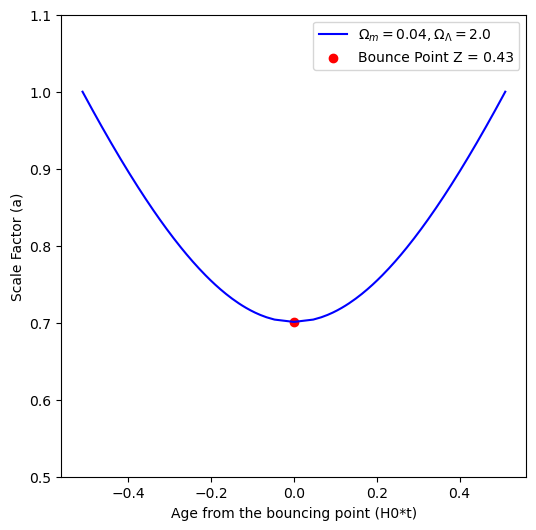

In [37]:
I = np.array([quad(integrand_age, crit_point[0], a, args= ([0.04, 2.]))[0] for a in Turnover_before])
bounce_point = [0,crit_point[0]]
z_bounce = 1 / bounce_point[1] - 1
plt.figure(figsize=(6, 6))
plt.plot(np.concatenate([-I[::-1],I]),np.concatenate([Turnover_before[::-1],Turnover_before]),  color='blue', label = r'$\Omega_m = 0.04, \Omega_\Lambda = 2.0$')
plt.scatter(bounce_point[0], bounce_point[1], color='red', label=f'Bounce Point Z = {z_bounce:.2f}')
plt.xlabel('Age from the bouncing point (H0*t)')
plt.ylim(0.5,1.1)
plt.legend()
plt.ylabel('Scale Factor (a)')